# Micro-Credit Defaulter Model

### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


# Importing the libraries

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset


In [10]:
pd. set_option("display.max_columns", None)
df = pd.read_csv("D:/micro_credit_loan.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


#### The column "Unnamed: 0" has no significance fo any kind

#### It's just a serial number which is same as the index number and hence this column is dropped in the beginning itself

#### column "msisdn" is the mobile number of the person and it doesn't really add any value in the analysis as well hence it's dropped.

In [11]:
df.drop(columns=["Unnamed: 0", "msisdn"], inplace=True)

### Shape of the dataset

#### The dataset appears to have a total of 209593 records (rows) and 35 features (columns) including 1 target column "label"

In [5]:
df.shape

(209593, 35)

In [6]:
#list of all the columns in dataset

df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pcircle', 'pdate'],
      dtype='object')

#### Splitting the date column into day and month for further analysis

#### I have not considered year to be split because this dataset by default is for the year 2016 and has no other years included

In [12]:
df["Day"] = pd.DatetimeIndex(df['pdate']).day
df["Month"] = pd.DatetimeIndex(df['pdate']).month

# Preporcessing

### The dataset appears to have all the information intact and as 209593 non-null out of 209593 rows.



### We have a totals of 21 float64 features, 14 int64 type features and 2 object type features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

#### Lets plot a heatmap to identify if any null values

#### We don't have any null / missing values in any columns

<AxesSubplot:>

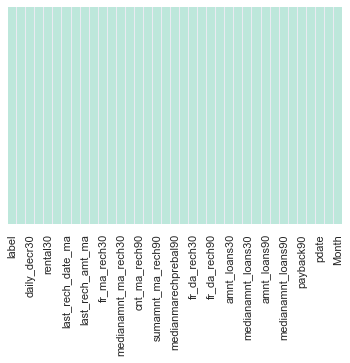

In [137]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="icefire")

# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### But if we observe, the std values are higher than the mean values for almost all the features and it's not correct.

#### We can assume that some human error may have happened and due to this we surely will find a lot of outliers and skewness in dataset.

#### Since it's a Bank dataset, there could be a possibility where certain number is actually genuine but all the features with similar issue is likely impossible just by coincidence and the data may not be accurate as seen.


#### For Eg: if you consider column "aon" we have values from min increasing gradually with some gap which is similar as it approaches higher quartiles, but the max value for the same is suddenly jumped to 999860.75 which is not accurate.

#### It's same for majority of features if not all and we have to reduce the outliers.

In [133]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


# Explore the dataset with Pandas Profiling

#### The following library helps in analyzing the dataset to give us some understanding on individual features

In [128]:
from pandas_profiling import ProfileReport

In [129]:
profile = ProfileReport(df, title="Pandas Profiling Report -Micro Loan", explorative=True)

In [142]:
# run this line if you want to generate the report in HTML

profile.to_file("micro_bank_profiling.html")

In [130]:
# run this line if you want to generate the report in Notebook itself

profile.to_widgets()

Summarize dataset:   0%|          | 0/50 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Lets plot a couple of plots for further understanding

#### Let's observe the relationship between the defaulter and non defaulters

#### Customers that have paid back the loaned amount within 5 days of insurance of loan are "non - defaulters" and if they haven't then they are "defaulters"

#### We can see that approximately 87.5% of customers have paid back and remaining 12.4% of customers are considered "defaulters"

#### This also tells us the dataset is highly imbalanced and we may have to take necessary steps to overcome this. 



In [138]:
label_percent = (df["label"].value_counts()/df.shape[0])*100
print(label_percent)

1    87.517713
0    12.482287
Name: label, dtype: float64


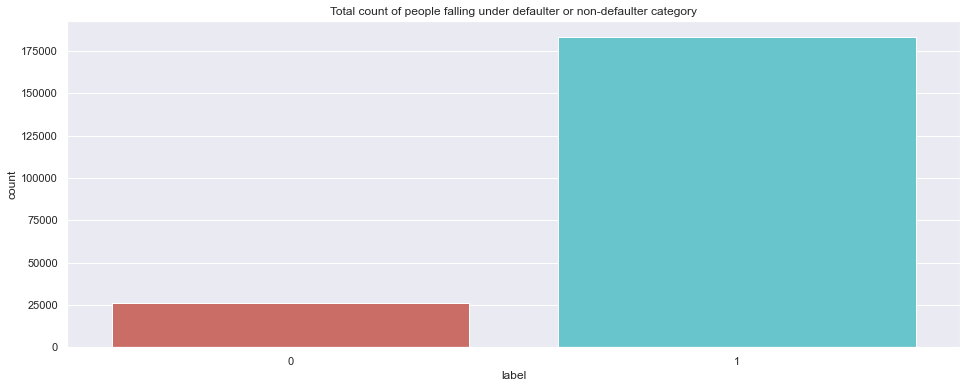

In [14]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="label", data=df, palette="hls").set(title='Total count of people falling under defaulter or non-defaulter category')

#### From the below plot, we can see that we have data for the months June, July and August and in general the outsanding loan amount count is less compared to the one's who have paid.

#### Also for the month of August we can see there is no defaulted amount but also the total loan recieved seems to be less in count.
#### Either the data is as is or data was only for half of August month.

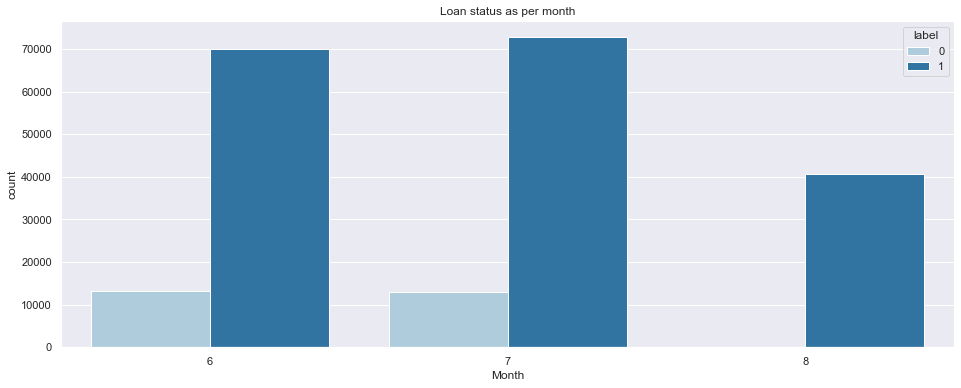

In [59]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Month", data=df, palette="Paired", hue="label").set(title='Loan status as per month')

#### From the below plot we can see the count of days and status of loan amount.

#### We can observe that from day 1 to 17 the payment of loan seems consistent and after 17th the inflow of loan amout seems to have reduced and is on same scale. Maybe customers are likely to pay in the first 2 weeks and as the month end approaches the pattern seems to change.

#### We can observe  in this plot for 31st day we have less count of inflow. This shows that majority of customers pay within the month except for few customers.

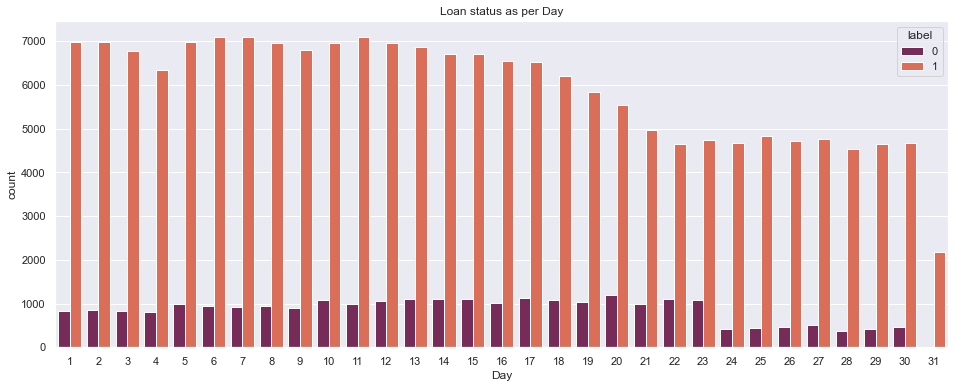

In [120]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Day", data=df, palette="rocket", hue="label").set(title='Loan status as per Day')

#### Lets now observe the pattern of payback of loan amout in 30 days

#### We previously observed that majority of people pay within month and some of them even on the last day of the month.

#### From the below plot we can observe that as and when their payback amount is increased, their avaerage account balance also gets decreased except for a few observations where they appeara to be outliers.

#### Since the average balance amout itself is less, repayment becomes a chaos but still very few customers have ended up defaulting and majority of them have already paid the loan amount.

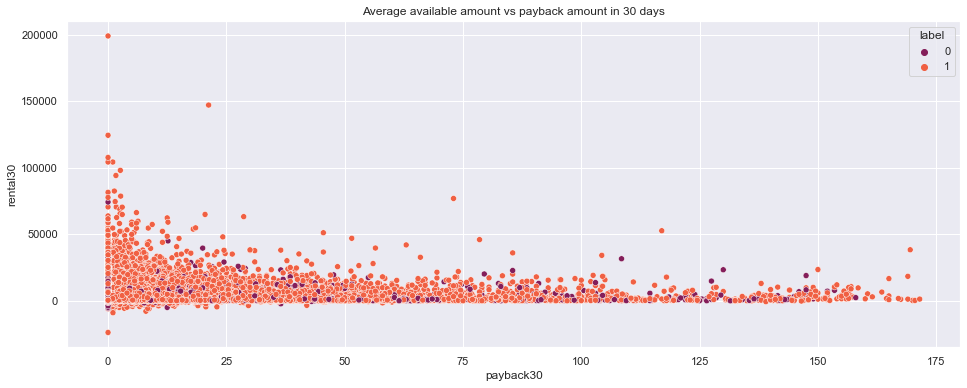

In [121]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.scatterplot(x="payback30", y="rental30", data=df, hue="label", palette="rocket").set(title='Average available amount vs payback amount in 30 days')

#### Let's see if the same pattern applies in the case of 90 days payback period.

#### From the plot, the distribution of amount seems as same as amount taken in 30 days but majority of customers seem to fall in category between 0 to 50000 Rupiah at least.

#### Also the outlier amount appears in the initial stages comapred to later stages. Maybe customers start filing in their account initially through salary etc hopeing to return tyhe amount as much as possible and also trying to keep the account balance above average.

#### Also just like in payback 30, here also customers prefer paying as early as possible and delay in payment is as same as in 30 days.

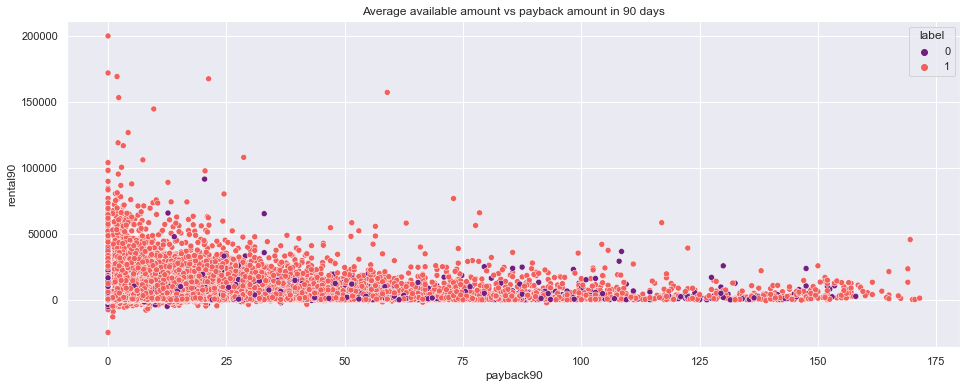

In [122]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.scatterplot(x="payback90", y="rental90", data=df, hue="label", palette="magma").set(title='Average available amount vs payback amount in 90 days')

#### The following subplot gives us decrease in amount for both 30 and 90 days and how much of average amount balance is left post that.

#### We can see that although defaulters are quite less as per plot, in case of 90 days we can find more defaulters compared to 30 days plot.

#### Here also we can see outliers more in case of 90 days plot. But they gradually decrease as the account balance is reduced. But in plot 1, outliers are scattered throughout.


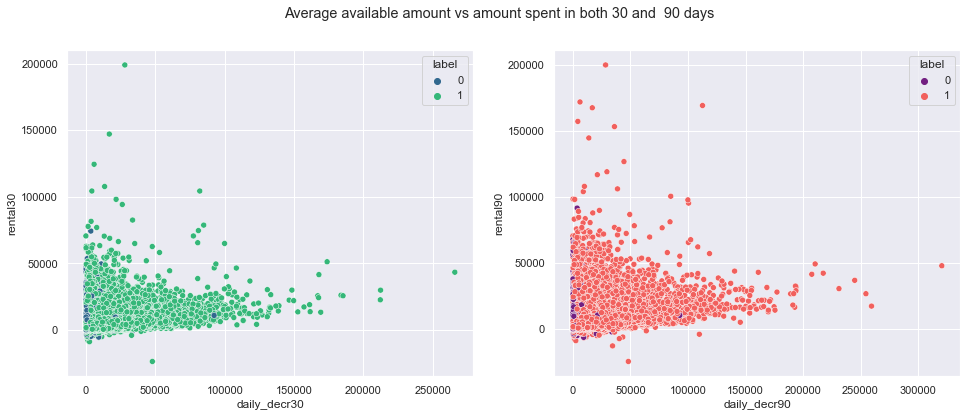

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Average available amount vs amount spent in both 30 and  90 days')

sns.scatterplot(ax=axes[0], x="daily_decr30", y="rental30", data=df, hue="label", palette="viridis")
sns.scatterplot(ax=axes[1], x="daily_decr90", y="rental90", data=df, hue="label", palette="magma")

plt.show()

#### From the below plot we can see how frequent customers recharge / or add amount to the account

#### From 1st plot we can see that customers either recharge in the 2nd month i.e. July compared to June or August. Also the frequency of recharge seems toreduce in the last month i.e. August

#### We can also see there are a few customers right in the beginning who may not have recharged at all.


#### From the 2nd plot we can see a person taking 90 days loan, then July and August months seems to have high frequency of recharges done and customers that are paying even at the end of July month have account balance managed till the month end. 

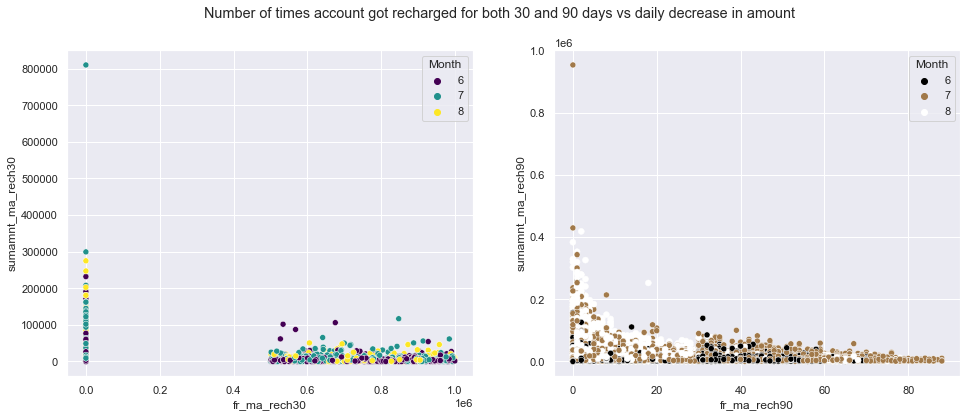

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Number of times account got recharged for both 30 and 90 days vs daily decrease in amount')

sns.scatterplot(ax=axes[0], x="fr_ma_rech30", y="sumamnt_ma_rech30", data=df, hue="Month", palette="viridis")
sns.scatterplot(ax=axes[1], x="fr_ma_rech90", y="sumamnt_ma_rech90", data=df, hue="Month", palette="cubehelix")

plt.show()

#### From the below plot the daily decrease of account balance is in relation with number of times the account got recharged

#### We can see that the more the number of times account got recharged, the less amout started to decrease. This makes sense and it's similar to both 30 days and 90 days.

#### We can see the majority of outliers lie in the range 1,50,000 to 2,70,000 Rupiah and defaulters counts are also minimum is both cases.

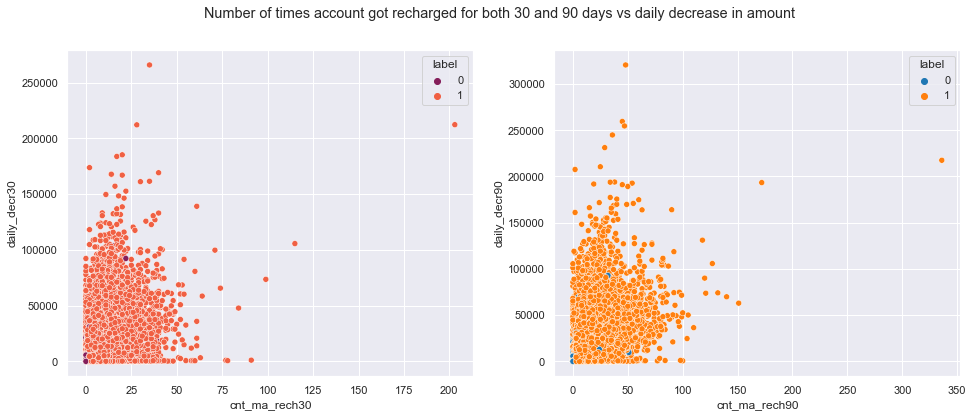

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Number of times account got recharged for both 30 and 90 days vs daily decrease in amount')

sns.scatterplot(ax=axes[0], x="cnt_ma_rech30", y="daily_decr30", data=df, hue="label", palette="rocket")
sns.scatterplot(ax=axes[1], x="cnt_ma_rech90", y="daily_decr90", data=df, hue="label", palette="tab10")

plt.show()

#### The below plot shows us the pattern of payback for both 30 days and 90 days with regards to recharge of amounts.

#### We can see from subplots for both the plots it's consistent. If loan amount / recharge is taken then it's paid immediately in both the cases and few number of customers seem to fall under defaulter category.


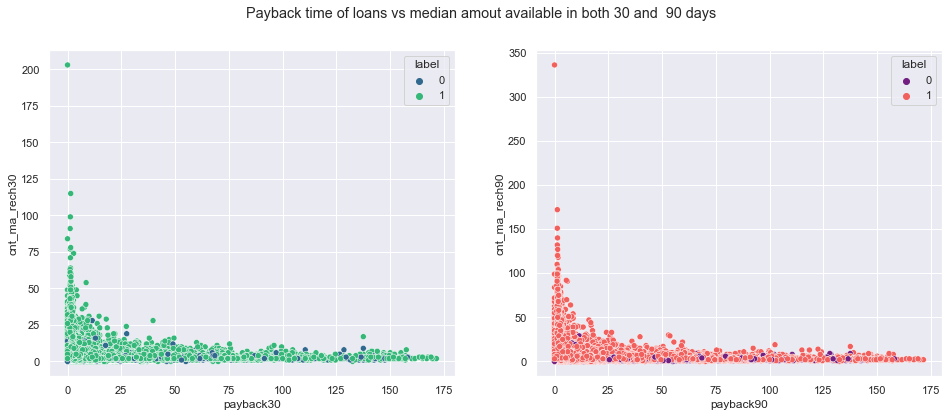

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Payback time of loans vs median amout available in both 30 and  90 days')

sns.scatterplot(ax=axes[0], x="payback30", y="cnt_ma_rech30", data=df, hue="label", palette="viridis")
sns.scatterplot(ax=axes[1], x="payback90", y="cnt_ma_rech90", data=df, hue="label", palette="magma")

plt.show()

#### The following plot shows us the the telecom circle that is associated with the MFI institutions. In this case its only UPW which is one of the telecom providers of Indonesia.

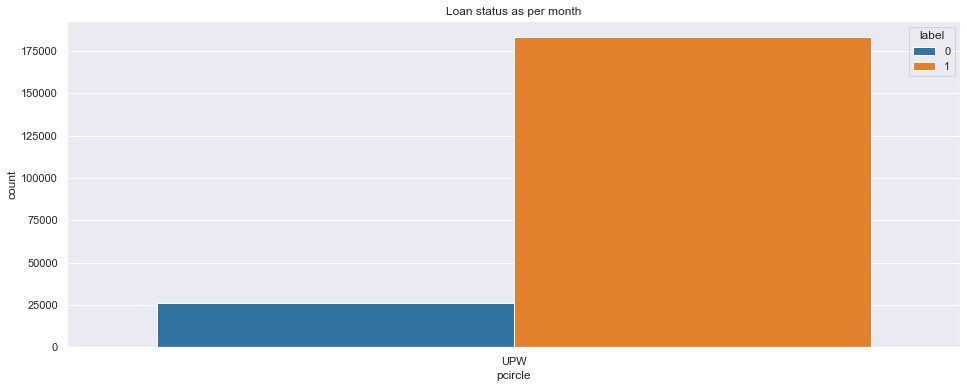

In [96]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="pcircle", data=df, palette="tab10", hue="label").set(title='Loan status as per month')

#### From the below plot we can see there is no much difference in the median amount of loan taken in both 30 and 90 days and with minor variations with respect to deault loans.

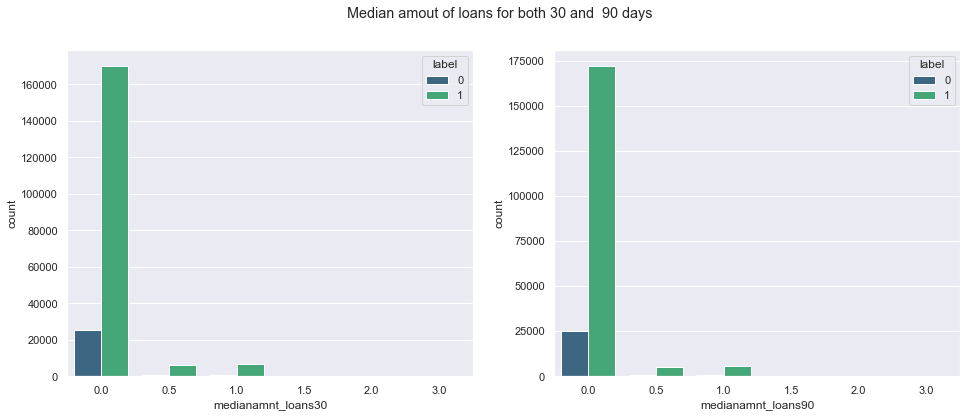

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Median amout of loans for both 30 and  90 days')

sns.countplot(ax=axes[0], x="medianamnt_loans30", data=df, hue="label", palette="viridis")
sns.countplot(ax=axes[1], x="medianamnt_loans90",data=df, hue="label", palette="viridis")

plt.show()

#### From the following plot we can observe the maximum amount returned is 6 Rupiah and 12 Rupiah.

#### This shows that this amount was paid as a fine for defaulting the payment by long time or simply because they delayed it by 5 days.

#### Since the bulge is high at Rupiah 6 because the amout recharged was Rupiah 5 compared to Rupiah 10. Not many people prefer getting recharge of more amount hence we can find customers with Rupiah 5.

<Figure size 1152x432 with 0 Axes>

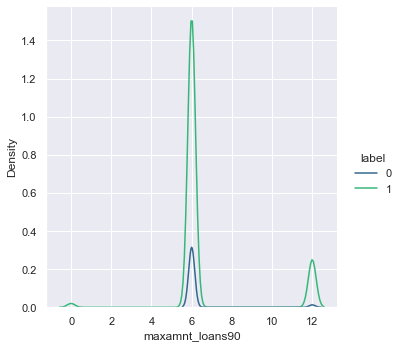

In [119]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.displot(x="maxamnt_loans90", data=df, hue="label", palette="viridis", kind="kde")

plt.show()

# Preprocessing


#### By splitting the date column to "Day' and "Month" the results were effective. Hence this "pdate" column is dropped as it will be a redundant column.

In [13]:
df.drop(columns="pdate", inplace=True)

### Encoding the dataset
##### I have used LabelEncoder as the data is categorical and is not ordinal in nature.
##### The column "pcircle" is converted into its corresponding numerical value.

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode the training dataset

df.pcircle = encoder.fit_transform(df.pcircle)

In [72]:
df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,0,20,7
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,0,10,8


# Distribution of all the columns in the dataset


### Majority if features are not normally distributed. Since we have multiple features, lets try to identify the distribution

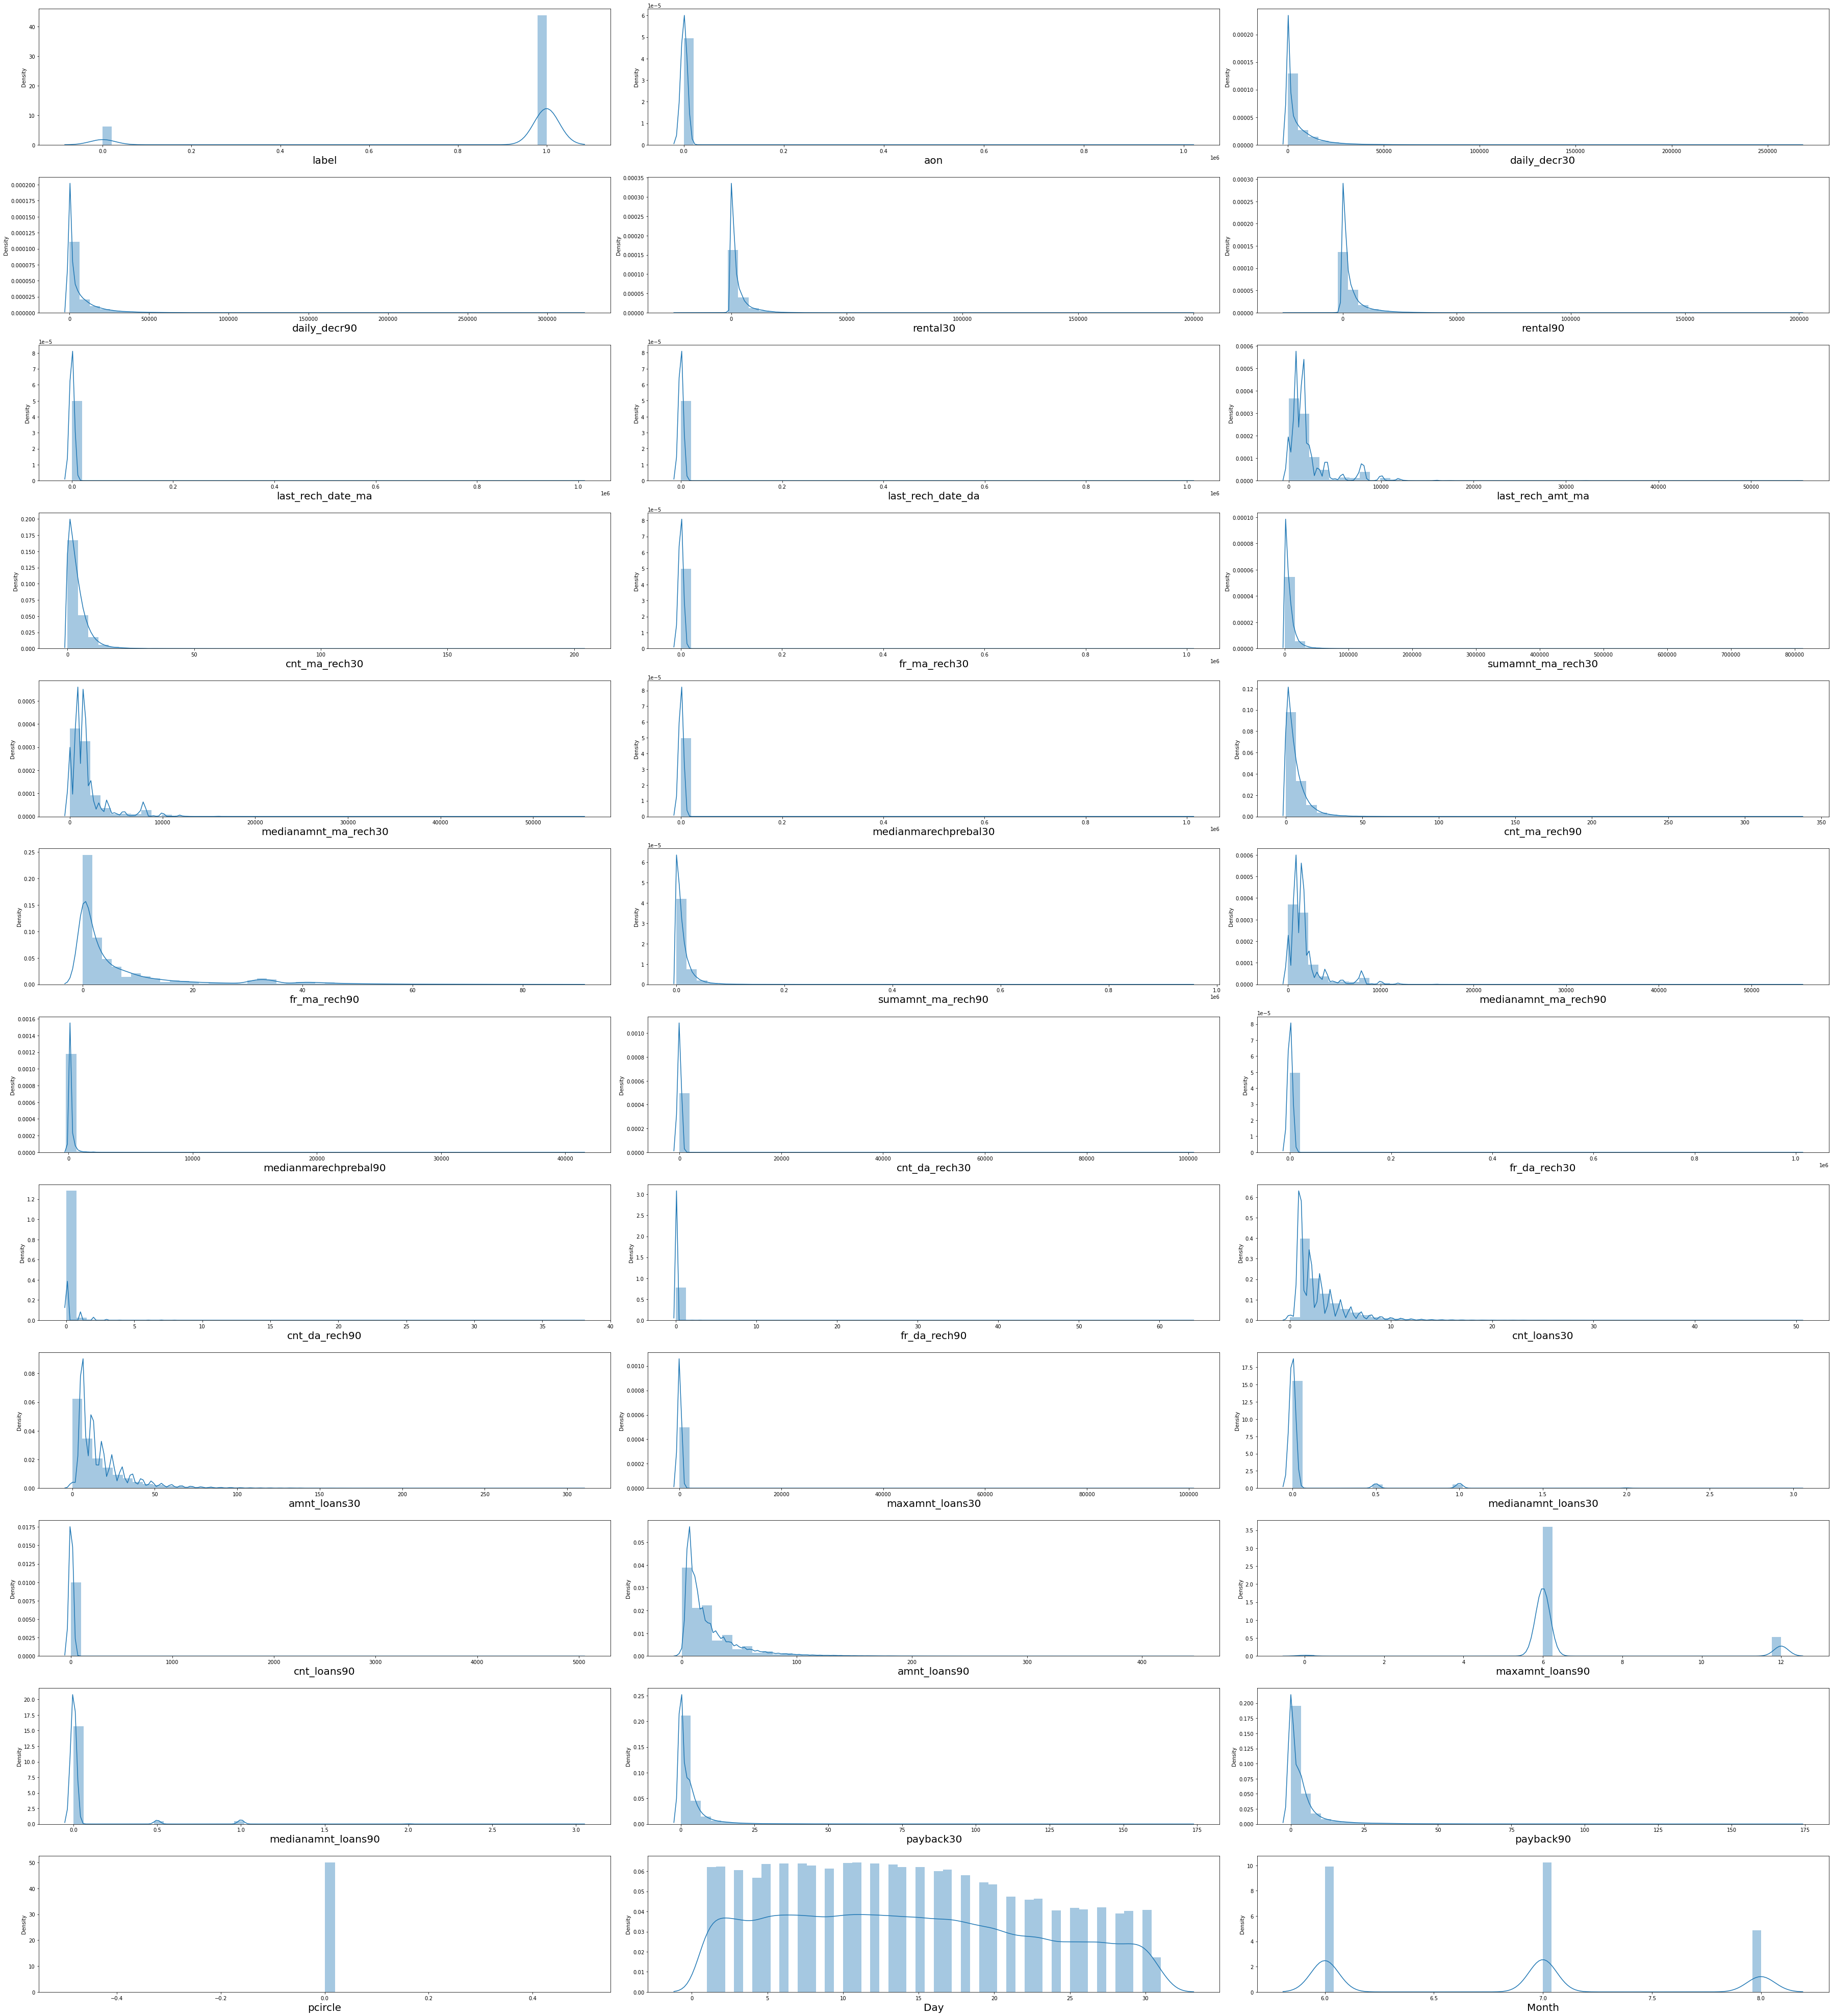

In [73]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=36:
        ax = plt.subplot(12,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

### I have considered columns 'aon', 'rental30', 'rental90', 'maxamnt_loans30', 'cnt_loans90', 'payback30', 'payback90' only.

### Ideally we should be considering more columns for outlier removal but since the customer wants minimal data loss withinh 7% to 8% only these variables are used.

In [15]:
from scipy.stats import zscore

z_score = zscore(df[['aon', 'rental30', 'rental90', 'maxamnt_loans30', 
                     'cnt_loans90', 'payback30', 'payback90']])

abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month
count,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.000000,195842.0,195842.000000,195842.000000
mean,0.874006,650.467525,5043.225193,5664.047640,2200.694444,2793.347325,3754.579681,3672.293188,2038.688254,3.936806,3733.599021,7522.313870,1789.030022,3828.914697,6.196454,7.696745,11988.277244,1843.519929,91.131471,262.026032,3786.751251,0.039185,0.043744,2.749706,17.782141,10.300723,0.053622,3.642247,23.207147,6.664148,0.045963,2.531859,3.112871,0.0,14.400420,6.769661
std,0.331844,498.619115,8550.306012,10035.942886,2933.701720,3793.791613,53922.583468,53085.940985,2308.081369,4.190479,53645.330111,9598.261001,2026.746030,53857.542485,6.954439,12.613366,15795.806059,2040.929068,341.940726,4177.106986,54153.315221,0.360357,0.930679,2.541565,17.047742,189.219112,0.217590,3.931317,25.618256,2.051735,0.200985,4.149079,4.881507,0.0,8.435814,0.734066
min,0.000000,-48.000000,-46.215000,-46.215000,-8898.940000,-12912.400000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,6.000000
25%,1.000000,239.000000,39.600000,39.780000,256.410000,285.840000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,10.500000,2.000000,0.000000,2312.000000,773.000000,14.500000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,7.000000,6.000000
50%,1.000000,515.000000,1243.587667,1269.595000,1004.940000,1232.010000,3.000000,0.000000,1539.000000,3.000000,2.000000,4625.000000,1539.000000,33.500000,4.000000,2.000000,7122.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.500000,0.0,14.000000,7.000000
75%,1.000000,958.000000,6826.745167,7320.012500,3001.405000,3795.800000,7.000000,0.000000,2309.000000,5.000000,6.000000,10004.000000,1924.000000,83.000000,8.000000,8.000000,15696.000000,1924.000000,79.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.500000,4.222222,0.0,21.000000,7.000000
max,1.000000,2440.000000,169237.902667,259525.000000,15617.510000,20794.550000,998650.377733,999171.809410,55000.000000,115.000000,999606.368132,299391.000000,55000.000000,999479.419319,151.000000,88.000000,429256.000000,55000.000000,41456.500000,99914.441420,999809.240107,30.000000,64.000000,50.000000,306.000000,12991.655121,3.000000,71.000000,426.000000,12.000000,3.000000,29.833333,35.200000,0.0,31.000000,8.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case the data is reuced to approximately 6.5% after applying z-score.

#### If all columns were used for outlier removal there would have been approximately 22% of data loss which is very high. Also by considereing 6.5 % data loss dataset, I have been able to achive a better model in the later stage.

In [16]:
# Percentage data loss:

loss_percent = (209593-195842)/209593*100
print(loss_percent)

6.5608107140982765


## Correlation of the features with the dependent variable "label"

### We can observe that  "cnt_ma_rech30", "cnt_ma_rech90",  "sumamnt_ma_rech90", "sumamnt_ma_rech30", "cnt_loans90", "amnt_loans90", "amnt_loans30", "cnt_loans30", "daily_decr30", "daily_decr90", "Month", "medianamnt_ma_rech30", "last_rech_amt_ma", "payback30", "medianamnt_ma_rech90"  and  "payback90" seem to have a strong correllation with the output variable.

In [76]:
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.241199
cnt_ma_rech90           0.241018
sumamnt_ma_rech90       0.212883
sumamnt_ma_rech30       0.210898
cnt_loans90             0.202929
amnt_loans90            0.202883
amnt_loans30            0.200838
cnt_loans30             0.199318
daily_decr30            0.170049
daily_decr90            0.168126
Month                   0.149214
medianamnt_ma_rech30    0.146445
last_rech_amt_ma        0.136284
payback30               0.126034
medianamnt_ma_rech90    0.125716
payback90               0.124257
fr_ma_rech90            0.088636
rental90                0.082368
aon                     0.082206
maxamnt_loans90         0.081955
rental30                0.062313
medianamnt_loans30      0.046152
medianmarechprebal90    0.045540
medianamnt_loans90      0.037678
Day                     0.008700
cnt_da_rech90           0.005204
last_rech_date_ma       0.004112
cnt_da_rech30           0.003602
maxamnt_loans30         0.002501
last_rech_

## Lets us now examine correlation using a "heatmap" for further clarification

#### Since there are multiple features, going through this plot may seem difficult. 


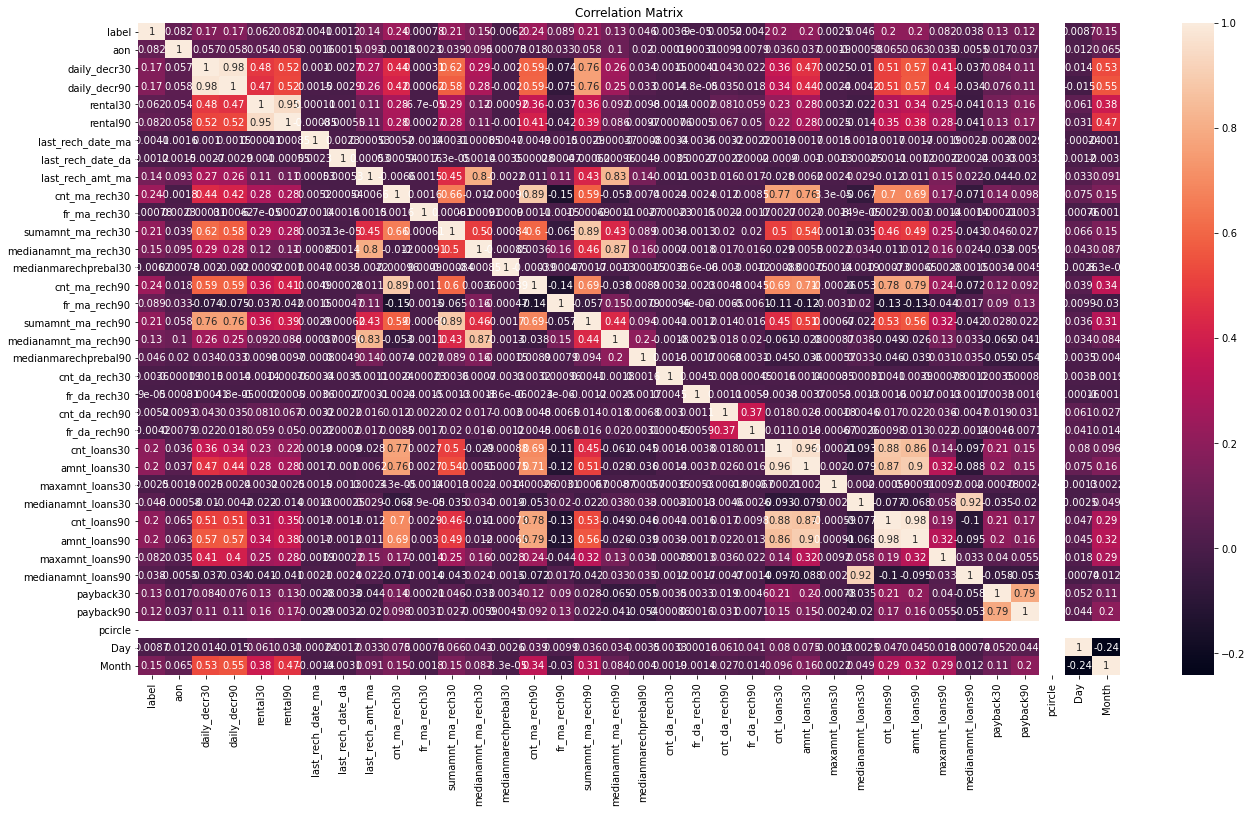

In [77]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [17]:
x = df.drop(columns = ["label"], axis=1)
y = df["label"]

### Check for skewness of data

In [79]:
x.skew()

aon                      0.950030
daily_decr30             3.423044
daily_decr90             3.720929
rental30                 1.992012
rental90                 2.025094
last_rech_date_ma       14.800614
last_rech_date_da       14.896702
last_rech_amt_ma         3.094107
cnt_ma_rech30            2.770319
fr_ma_rech30            14.783584
sumamnt_ma_rech30        3.932491
medianamnt_ma_rech30     2.979389
medianmarechprebal30    14.819168
cnt_ma_rech90            2.877944
fr_ma_rech90             2.272848
sumamnt_ma_rech90        3.857468
medianamnt_ma_rech90     3.220217
medianmarechprebal90    45.407089
cnt_da_rech30           17.821791
fr_da_rech30            14.703786
cnt_da_rech90           23.999877
fr_da_rech90            29.598337
cnt_loans30              2.679032
amnt_loans30             2.863712
maxamnt_loans30         54.211825
medianamnt_loans30       4.565602
cnt_loans90              2.917161
amnt_loans90             3.035988
maxamnt_loans90          1.763249
medianamnt_loa

In [80]:
x.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pcircle', 'Day', 'Month'],
      dtype='object')

# Storing the list of features having skewness in a variable "feat_skew". It's would be easier to pass it through at one go


In [18]:
feat_skew = ['daily_decr30', 'daily_decr90', 'rental30', 'rental90',
               'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
               'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
               'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
               'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
               'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
               'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
               'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
               'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.75903326, -0.23252738, -0.25895965, ...,  0.        ,
         0.6637883 ,  0.31378569],
       [ 0.12340608,  0.82789936,  0.64375803, ...,  0.        ,
        -0.5216368 ,  1.67606495],
       [-0.2315752 , -0.42632796, -0.425078  , ...,  0.        ,
         0.54524579,  1.67606495],
       ...,
       [ 0.72707482,  0.79528193,  0.62179691, ...,  0.        ,
         1.73067089,  0.31378569],
       [ 2.16906092,  0.87073166,  0.68855912, ...,  0.        ,
         1.25650085,  0.31378569],
       [ 1.86622378, -0.06477717, -0.11251863, ...,  0.        ,
        -0.87726433,  0.31378569]])

# Power Transformer (yeo-Johnson)

#### To reduce the skewness to some extent, I have used a Power Transformer technique
#### Since we have both positive and negative values in skewness, I have used "Yeo-Johnson" technique

## The data is further standardized

In [20]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[feat_skew] = scaler.fit_transform(x[feat_skew].values) 

x[feat_skew]

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.439640,0.411151,-0.651986,-0.645390,-0.023647,-0.072309,0.097292,-0.261944,1.610062,-0.159973,0.224048,-0.042169,-0.562974,1.337280,-0.424008,0.160094,-0.339405,-0.139854,-0.086366,-0.160529,-0.062909,0.020701,-0.086958,-0.132171,-0.267282,-0.176090,-0.236207,-0.275645,-0.247069,1.870095,1.905215
1,1.155676,1.097639,0.579587,0.330056,0.190154,-0.072309,1.510705,-0.783365,-1.117141,0.237849,1.638989,0.016650,-1.011305,-1.194937,-0.068490,1.688633,-0.005466,-0.139854,-0.086366,-0.160529,-0.062909,-0.910342,-0.086958,1.650930,-0.267282,-1.026526,-0.236207,2.397646,-0.247069,-0.922314,-0.997957
2,0.107438,0.088636,-0.371183,-0.432930,0.001507,-0.072309,0.097292,-0.783365,-1.117141,-0.517463,0.224048,0.020526,-1.011305,-1.194937,-0.745348,0.160094,0.021986,-0.139854,-0.086366,-0.160529,-0.062909,-0.910342,-0.892340,-0.132171,-0.267282,-1.026526,-0.998812,-0.275645,-0.247069,-0.922314,-0.997957
3,-1.038036,-1.032125,-0.680742,-0.683747,0.296844,-0.072309,-0.275753,-1.673819,-1.117141,-1.883452,-1.940319,-0.065115,-1.011305,-1.194937,-0.934447,-0.237898,-0.385788,-0.139854,-0.086366,-0.160529,-0.062909,0.020701,-0.086958,-0.132171,-0.267282,-0.176090,-0.236207,-0.275645,-0.247069,-0.922314,-0.997957
4,-0.613436,-0.613646,-0.296141,-0.372423,0.022370,-0.072309,0.462147,1.001030,0.204347,1.281231,0.588555,-0.011726,0.672400,-0.046752,1.001309,0.794292,-0.150662,-0.139854,-0.086366,-0.160529,-0.062909,1.571159,1.468347,-0.132171,-0.267282,1.233070,1.118447,-0.275645,-0.247069,0.699266,0.498772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.611273,-0.611526,-0.299761,-0.375340,-0.056022,-0.072309,1.061885,0.108251,0.204347,0.682225,0.915283,0.037375,-0.242406,-0.046752,0.326509,0.904248,0.148054,-0.139854,-0.086366,-0.160529,-0.062909,0.020701,-0.086958,-0.132171,-0.267282,-0.176090,-0.236207,-0.275645,-0.247069,0.143979,-0.048923
209589,-0.934481,-0.929640,-0.069247,-0.189870,0.022370,-0.072309,-0.413650,0.395535,-0.224640,-0.157377,-0.285305,0.073916,0.387118,-0.046752,-0.279185,-0.384284,0.241096,-0.139854,-0.086366,-0.160529,-0.062909,0.565454,0.406584,-0.132171,-0.267282,0.320173,0.209997,-0.275645,-0.247069,0.143979,-0.048923
209590,1.142012,1.087327,1.242157,1.553012,0.001507,-0.072309,0.097292,0.630352,1.099541,0.593949,0.224048,0.008897,1.000937,0.520925,0.790587,0.160094,-0.080678,-0.139854,-0.086366,-0.160529,-0.062909,0.932158,1.468347,1.650930,-0.267282,1.083657,1.378924,2.397646,-0.247069,1.037988,0.831880
209591,1.173234,1.118208,-0.567120,-0.407011,-0.023647,1.653326,-0.413650,0.630352,0.664017,0.813846,-0.285305,0.075156,0.387118,0.381735,0.759756,0.596900,0.186703,-0.139854,-0.086366,6.229389,-0.062909,0.020701,0.406584,1.650930,-0.267282,0.320173,0.522988,2.397646,-0.247069,-0.922314,1.439627


# Check the skewness of the feature dataset
#### The skewness seems to have reduced considerably if not fully

In [84]:
x.skew()

aon                       0.950030
daily_decr30             -2.277523
daily_decr90             -2.444201
rental30                  0.260746
rental90                  0.137745
last_rech_date_ma        -5.181227
last_rech_date_da      -103.712950
last_rech_amt_ma         -0.086040
cnt_ma_rech30            -0.000271
fr_ma_rech30              0.173541
sumamnt_ma_rech30        -0.314148
medianamnt_ma_rech30     -0.211683
medianmarechprebal30     -0.207875
cnt_ma_rech90            -0.003742
fr_ma_rech90              0.149226
sumamnt_ma_rech90        -0.218211
medianamnt_ma_rech90     -0.069295
medianmarechprebal90      7.109095
cnt_da_rech30             7.010531
fr_da_rech30             11.492299
cnt_da_rech90             6.068906
fr_da_rech90             15.833166
cnt_loans30               0.042133
amnt_loans30             -0.000160
maxamnt_loans30          -0.290609
medianamnt_loans30        3.474116
cnt_loans90               0.103030
amnt_loans90             -0.008414
maxamnt_loans90     

# Distribution after skewness is removed to some extent

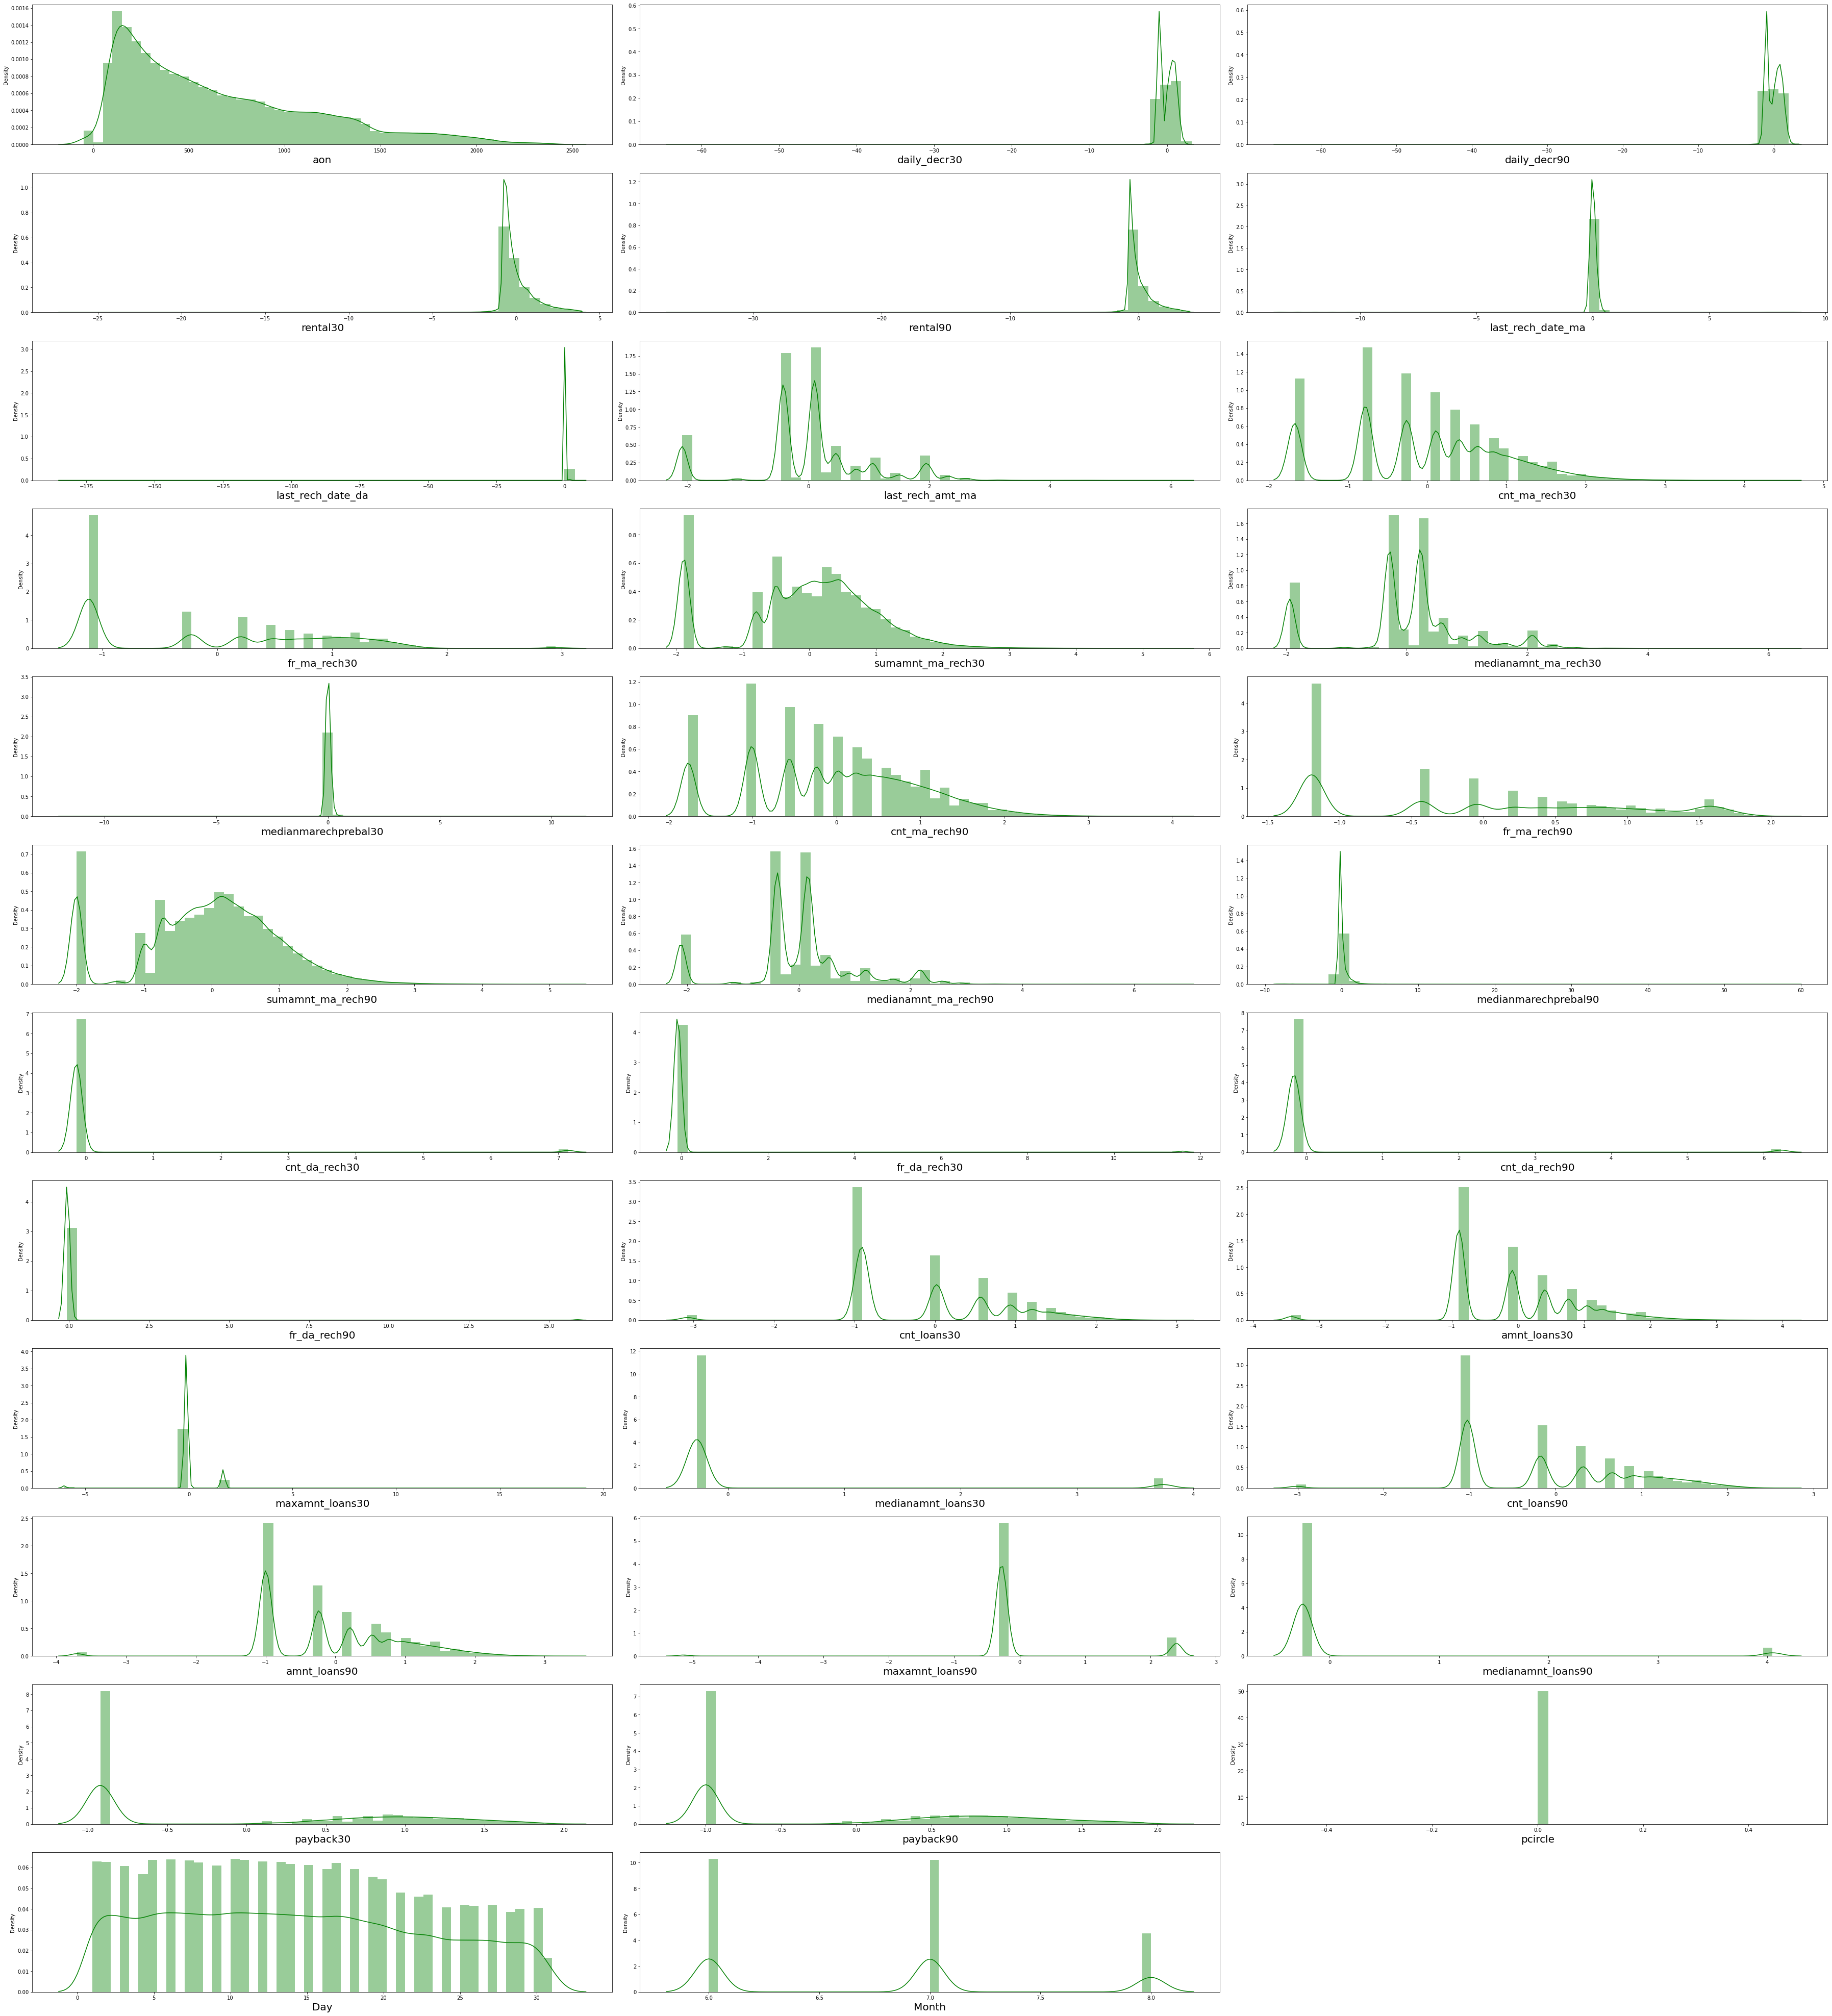

In [85]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=36:
        ax = plt.subplot(12,3, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, we can find many variables that have VIF and I have not considered fropping these columns as data is dynamic and every value seemed important. 
### Also without dropping the features I got even better accuracy in the final model.

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.024603,aon
1,32.208290,daily_decr30
2,35.408004,daily_decr90
3,12.031268,rental30
4,13.301639,rental90
5,1.000192,last_rech_date_ma
6,1.000169,last_rech_date_da
7,3.568004,last_rech_amt_ma
8,15.454352,cnt_ma_rech30
9,1.000164,fr_ma_rech30


# Check if the dataset is over sampling or under sampling

#### Our target variable is hignly imbalanced.

In [21]:
df["label"].value_counts()

1    171167
0     24675
Name: label, dtype: int64

# I will proceed with SMOTE technique for Over Sampling of dataset
### Although very few amount of values are imbalanced, I would still consider it to be imbalanced dataset because, the accuracy of the model after balancing the dataset was much better than the unbalanced dataset.

In [22]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

## Balanced dataset after SMOTE

In [23]:
y_over.value_counts()

0    171167
1    171167
Name: label, dtype: int64

# split the dataset into train and test data set

#### I have chosed 200 random state and 30% of data is divided in text dataset

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 6 ML models in this scenario

### 1) ExtraTreeClassifier (non ensemble)

In [93]:
from sklearn.tree import ExtraTreeClassifier

ex_tree_class = ExtraTreeClassifier()
ex_tree_class.fit(x_train,y_train)

y_pred = ex_tree_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8823185752816428
[[45353  5911]
 [ 6175 45262]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     51264
           1       0.88      0.88      0.88     51437

    accuracy                           0.88    102701
   macro avg       0.88      0.88      0.88    102701
weighted avg       0.88      0.88      0.88    102701



### 2) DecisionTreeClassifier 

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9097574512419548
[[46789  4475]
 [ 4793 46644]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     51264
           1       0.91      0.91      0.91     51437

    accuracy                           0.91    102701
   macro avg       0.91      0.91      0.91    102701
weighted avg       0.91      0.91      0.91    102701



### 3) RandomForestClassifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9440317036835084
[[47776  3488]
 [ 2260 49177]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     51264
           1       0.93      0.96      0.94     51437

    accuracy                           0.94    102701
   macro avg       0.94      0.94      0.94    102701
weighted avg       0.94      0.94      0.94    102701



### 4) ExtraTreesClassifier

In [96]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9449177710051508
[[48121  3143]
 [ 2514 48923]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     51264
           1       0.94      0.95      0.95     51437

    accuracy                           0.94    102701
   macro avg       0.94      0.94      0.94    102701
weighted avg       0.94      0.94      0.94    102701



### 5) HistGradientBoostingClassifier

In [97]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hist_class = HistGradientBoostingClassifier()
hist_class.fit(x_train,y_train)

y_pred = hist_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.93754685932951
[[47586  3678]
 [ 2736 48701]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     51264
           1       0.93      0.95      0.94     51437

    accuracy                           0.94    102701
   macro avg       0.94      0.94      0.94    102701
weighted avg       0.94      0.94      0.94    102701



### 6) XGBClassifier

In [98]:
from xgboost import XGBClassifier
xgb_reg = XGBClassifier(eval_metric='mlogloss')
xgb_reg.fit(x_train,y_train)

y_pred = xgb_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9442556547648027
[[47924  3340]
 [ 2385 49052]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     51264
           1       0.94      0.95      0.94     51437

    accuracy                           0.94    102701
   macro avg       0.94      0.94      0.94    102701
weighted avg       0.94      0.94      0.94    102701



# Cross validation to check if its overfitting

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
scr = cross_val_score(ex_tree_class, x, y, cv=5)
print("Cross Validation score of ExtraTreeClassifier model is:", scr.mean())

Cross Validation score of ExtraTreeClassifier model is: 0.8747306514759989


In [101]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.8846417084017689


In [102]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.921564321152457


In [103]:
scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

Cross Validation score of ExtraTreesClassifier model is: 0.9191235827711225


In [104]:
scr = cross_val_score(hist_class, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingClassifier model is:", scr.mean())

Cross Validation score of HistGradientBoostingClassifier model is: 0.9236425370653762


In [105]:
scr = cross_val_score(xgb_reg, x, y, cv=5)
print("Cross Validation score of XGBClassifier model is:", scr.mean())

Cross Validation score of XGBClassifier model is: 0.9235302022891585


# Selecting the best ML model for this dataset

### From the above algorithms ExtraTreeClassifier seems to be an ideal algorithm in this scenario and for this type of dataset.

### The difference between the accuracy score and cross validation for this model is very less compared to other models.

| Sr.No.| Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- | --- |---|
| 1 | ExtraTreeClassifier | 0.882318575281642 | 0.874730651475998 | 0.00758792380564399 |
| 2 | DecisionTreeClassifier | 0.909757451241954 | 0.884641708401768 | 0.0251157428401859 |
| 3 | RandomForestClassifier | 0.944031703683508 | 0.921564321152457 | 0.022467382531051 |
| 4 | ExtraTreesClassifier | 0.94491777100515 | 0.919123582771122 | 0.0257941882340279 |
| 5 | HistGradientBoostingClassifier | 0.93754685932951 | 0.923642537065376 | 0.013904322264134 |
| 6 | XGBClassifier | 0.944255654764802 | 0.923530202289158 | 0.0207254524756439 |



# ROC AUC score for all the algorithms

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [107]:
#ROC AUC score for ExtraTreeClassifier

roc_auc_score(y_test, ex_tree_class.predict(x_test))

0.8823225714940743

In [108]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.9097624110240842

In [109]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.9440114031595855

In [110]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, ex_reg.predict(x_test))

0.9449072978202587

In [111]:
#ROC AUC score for HistGradientBoostingClassifier

roc_auc_score(y_test, hist_class.predict(x_test))

0.937531231389273

In [112]:
#ROC AUC score for XGBClassifier

roc_auc_score(y_test, xgb_reg.predict(x_test))

0.9442398326345522

# ROC AUC score plots

#### We can see the ROC curve shows more for ExtraTreeClassifier. 

#### But we will get its checked by referring to the difference of model accuracy and cross validation score

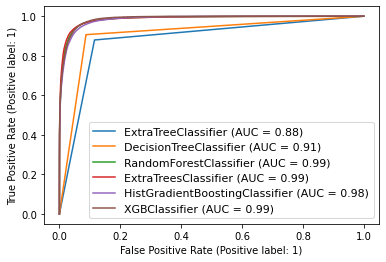

In [113]:
disp = plot_roc_curve(ex_tree_class, x_test, y_test)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(hist_class, x_test, y_test, ax=disp.ax_)

plot_roc_curve(xgb_reg, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":11}, loc="lower right")

plt.show()

# Hyper Parameter Tuning

### Let us try to tune the proposed model (ExtraTreeClassifier) to get better accuracy, if possible

### The "paramaters" have been selected from the skicit library and I have considered 7 paramaters

In [114]:
parameters = {"criterion":["gini", "entropy"],
              "splitter":["random", "best"],
              "max_features":["auto", "sqrt", "log2"],
              "random_state":[50, 70, 100, 120, 130],
              "min_samples_split":[1, 2, 3, 4, 5],
              "min_samples_leaf":[1, 2, 3, 4, 5],
              "max_leaf_nodes":[1, 2, 3, 4, 5]
              }

### RandomizedSearchCV is used to tune the parameters by fitting the same to the training dataset

In [115]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(ExtraTreeClassifier(), parameters, cv=5, n_iter=10)

In [116]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'random_state': [50, 70, 100, 120, 130],
                                        'splitter': ['random', 'best']})

In [117]:
RCV.best_params_

{'splitter': 'best',
 'random_state': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 4,
 'max_features': 'auto',
 'criterion': 'entropy'}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that the model accuracy was approximately 88.23 % earlier and post Hyper Parameter tuning its now approximately 90.07 % better 

In [33]:
mod_ext_tree_class = ExtraTreeClassifier(splitter= "best", random_state= 120, min_samples_split= 4, min_samples_leaf= 3, 
                                 max_features= "auto", criterion= "entropy")

mod_ext_tree_class.fit(x_train,y_train)
pred = mod_ext_tree_class.predict(x_test)
print(accuracy_score(y_test,pred)*100)

90.07994079901852


# Saving the model (using joblib)

In [34]:
# Saving the model

import joblib
joblib.dump(mod_ext_tree_class,"Micro_Loan_bank.pkl")

['Micro_Loan_bank.pkl']

# Loading the saved model

In [35]:
model = joblib.load("Micro_Loan_bank.pkl")

In [36]:
prediction = model.predict(x_test)

In [37]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,1
1,1
2,1
3,0
4,0
...,...
102696,1
102697,0
102698,1
102699,1


# Model Dashboard using ExplainerDashboard

In [1]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [38]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(mod_ext_tree_class, x_test, y_test)

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [ ]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/102701 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.0.105:8050
Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "explainerdashboard.dashboards" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
192.168.0.105 - - [30/Aug/2021 15:50:21] "GET / HTTP/1.1" 200 -
192.168.0.105 - - [30/Aug/2021 15:50:21] "GET /_dash-component-suites/dash/deps/react-dom@16.v1_21_0m1630226141.14.0.min.js HTTP/1.1" 200 -
192.168.0.105 - - [30/Aug/2021 15:50:22] "GET /_dash-component-suites/dash/deps/prop-types@15.v1_21_0m1630226141.7.2.min.js HTTP/1.1" 200 -
192.168.0.105 - - [30/Aug/2021 15:50:22] "GET /assets/bootstrap.min.css?m=1630226153.9783914 HTTP/1.1" 200 -
192.168.0.105 - - [30/Aug/2021 15:50:22] "GET /_dash-component-suites/dash_core_components/dash_core_components-shared.v1_17_1m1630226140.js HTTP/1.1" 200 -
192.168.0.105 - - [30/Aug/2021 15:50:22] "GET /_dash-component-suites/dash_table/bundle.v4_12_0m1630226137.js HTTP/1.1" 200 -
192.168.0.105 - - [30/Aug/2021 15:50:22] "GET /_dash-component-suites/dash/deps/polyfill@7.v1_21_0m1630226141.12.1.min.js HTTP/1.1" 200 -
192.168.0.105 - - [30/Aug/2021 15:50:22] "GET /_dash-component-suite